Note that the implementation of the arima forecast is already done in the inventory impairment class.

In [2]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import json

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28288\1462781393.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:\Users\Usuario\AppData\Local\Temp\ipykernel_31936\1911278341.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(0, inplace=True)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\Usuario\AppData\Local\Packages\Pytho

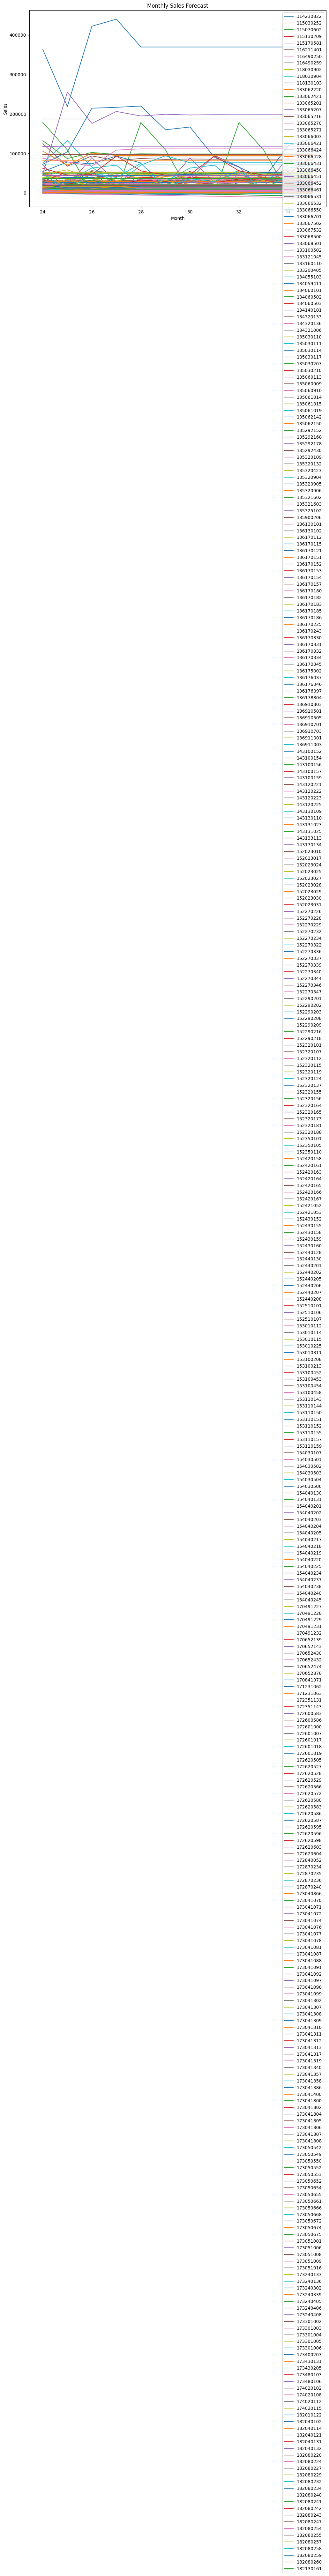

In [15]:


data = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_month.xlsx")

# Function to fit ARIMA model and forecast
def fit_auto_arima_and_forecast(series):
    model = auto_arima(series, m=4)
    forecast = model.predict(n_periods=12)
    return forecast

ts = ['Jan_2022', "Feb_2022", "Mar_2022", "Apr_2022", "May_2022", "Jun_2022", "Jul_2022", "Aug_2022", "Sep_2022", "Oct_2022", "Nov_2022", "Dec_2022", 'Jan_2023', "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023", "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"]
data.fillna(0, inplace=True)
# Perform ARIMA forecasting for each product
forecasts = {}
for product in data['material']:
    product_sales = data[data['material'] == product][ts].values.flatten()
    forecast = fit_auto_arima_and_forecast(product_sales)
    forecasts[product] = forecast


# Plot the forecasts
plt.figure(figsize=(12, 8))
for product, forecast in forecasts.items():
    plt.plot(np.arange(len(product_sales), len(product_sales) + len(forecast)), forecast, label=product)
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [20]:
import json
new_forecasts = {key: list(value) for key, value in forecasts.items()}
# Saving the dictionary to a JSON file
with open("arima.json", "w") as json_file:
    json.dump(new_forecasts, json_file)


In [4]:
with open("arima.json", "r") as json_file:
    forecasts = json.load( json_file)

In [17]:
data = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_month.xlsx")

In [106]:
for key, value in forecasts.items():
    if sum(value) <= 10:
        print(f"{key} se'n va a la merda ({value})")
    if key == '173041357':
        print(value)

116490250 se'n va a la merda ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
133100502 se'n va a la merda ([70.52611275522294, -110.02392544239895, -169.86336190279042, -189.9307643220637, -200.37687423764442, -291.50550552079983, -353.01092838803356, -390.29511951069463, -426.4885123027386, -490.1618317457839, -546.978772617186, -592.5326454813859])
134060101 se'n va a la merda ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
135292178 se'n va a la merda ([200.68993362243936, -155.0681697770646, -216.89385850473258, -556.700404522973, -253.71628165461192, -525.3404463052588, -359.8491440168285, -626.6872651341228, -465.9296032626247, -728.0859133097389, -571.9588006490461, -829.535262070858])
136170180 se'n va a la merda ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
136170186 se'n va a la merda ([1.4387902237864167e-63, 4.23054094010482e-64, 1.140128666992394e-63, 6.338988223076137e-64, 9.912795820016841e-64, 7.389811275732607e-64, 9.17095

In [86]:
a = []
for key, value in forecasts.items():
    a.append(sum(value))

In [87]:
def calculate_decrease(current_sales, predicted_sales):
    decrease_indicator = []
    for current, predicted in zip(current_sales, predicted_sales):
        if predicted <= 0:
            decrease_indicator.append(400)  
        else:
            decrease_percentage = - ((current - predicted) / current) * 100 if current != 0 else -10
            decrease_indicator.append(decrease_percentage)
    return decrease_indicator

indicators = calculate_decrease(data["vendes_2023"], a)

print(max(indicators))
for i, indicator in enumerate(indicators):
    print(f"Product {data['material'][i] }: Decrease Indicator = {indicator:.2f}%")


400
Product 114230822: Decrease Indicator = 5.25%
Product 115030252: Decrease Indicator = 140.03%
Product 115070602: Decrease Indicator = 96.80%
Product 115130209: Decrease Indicator = 15.40%
Product 115170581: Decrease Indicator = -31.23%
Product 116211401: Decrease Indicator = 37.32%
Product 116490250: Decrease Indicator = 400.00%
Product 116490259: Decrease Indicator = 3.47%
Product 118030902: Decrease Indicator = -1.69%
Product 118030904: Decrease Indicator = 13.99%
Product 118130103: Decrease Indicator = 33.08%
Product 133062220: Decrease Indicator = 33.83%
Product 133062421: Decrease Indicator = 3.26%
Product 133065201: Decrease Indicator = 63.48%
Product 133065207: Decrease Indicator = 45.47%
Product 133065216: Decrease Indicator = -19.20%
Product 133065270: Decrease Indicator = 18.63%
Product 133065271: Decrease Indicator = 228.62%
Product 133066003: Decrease Indicator = 0.30%
Product 133066421: Decrease Indicator = 46.07%
Product 133066424: Decrease Indicator = 205.51%
Product

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
indicators = scaler.fit_transform([[i] for i in indicators])

In [89]:
indicators2 = [i[0] for i in indicators]

In [93]:
print(min(indicators2))

0.0


In [95]:
data.head()

,Unnamed: 0.1,Unnamed: 0,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,...,Aug_2022,Aug_2023,Sep_2022,Sep_2023,Oct_2022,Oct_2023,Nov_2022,Nov_2023,Dec_2022,Dec_2023
0,0,0,114230822,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,0.012679,...,3102.574049,3997.348603,1386.231158,7275.073487,3532.453821,2393.860683,10290.288749,3573.065705,7437.975827,4715.931899
1,1,1,115030252,75900.0,6825.62,0.089929,27600.0,2127.68,0.077090,-0.012839,...,1661.795588,506.086882,631.355537,0.000000,1047.632346,427.803972,0.000000,193.955142,287.229412,150.170606
2,2,2,115070602,884000.0,100307.84,0.113470,340000.0,34522.45,0.101537,-0.011934,...,222.035977,4407.786380,4766.816425,1701.068827,8875.043894,0.000000,13683.961246,2679.708550,17310.488615,2527.829452
3,3,3,115130209,23217.0,5179.48,0.223090,15600.0,3770.68,0.241710,0.018620,...,392.507034,640.149418,887.130641,352.573930,0.000000,397.675659,0.000000,466.076696,0.000000,152.991466
4,4,4,115170581,357000.0,26188.50,0.073357,1023000.0,74195.50,0.072527,-0.000830,...,7085.292465,6370.984442,2676.162601,4818.004752,421.745776,20349.658190,3045.917856,0.000000,0.000000,496.791704


In [102]:
data = data.assign(forecast_index = indicators2)

In [103]:
data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,proporcio_variacio_preu_venda_unitari_2022_2023,data_darrera_entrada,...,Aug_2023,Sep_2022,Sep_2023,Oct_2022,Oct_2023,Nov_2022,Nov_2023,Dec_2022,Dec_2023,forecast_index
0,114230822,1018500.0,54892.49,0.053895,885500.0,58951.87,0.066575,0.012679,0.235256,1970-01-01 01:00:45.351,...,3997.348603,1386.231158,7275.073487,3532.453821,2393.860683,10290.288749,3573.065705,7437.975827,4715.931899,0.210499
1,115030252,75900.0,6825.62,0.089929,27600.0,2127.68,0.077090,-0.012839,-0.142771,1970-01-01 01:00:45.315,...,506.086882,631.355537,0.000000,1047.632346,427.803972,0.000000,193.955142,287.229412,150.170606,0.480055
2,115070602,884000.0,100307.84,0.113470,340000.0,34522.45,0.101537,-0.011934,-0.105171,1970-01-01 01:00:45.328,...,4407.786380,4766.816425,1701.068827,8875.043894,0.000000,13683.961246,2679.708550,17310.488615,2527.829452,0.393597
3,115130209,23217.0,5179.48,0.223090,15600.0,3770.68,0.241710,0.018620,0.083465,1970-01-01 01:00:45.281,...,640.149418,887.130641,352.573930,0.000000,397.675659,0.000000,466.076696,0.000000,152.991466,0.230800
4,115170581,357000.0,26188.50,0.073357,1023000.0,74195.50,0.072527,-0.000830,-0.011311,1970-01-01 01:00:45.331,...,6370.984442,2676.162601,4818.004752,421.745776,20349.658190,3045.917856,0.000000,0.000000,496.791704,0.137538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,182080257,1059840.0,27030.19,0.025504,691200.0,17886.40,0.025877,0.000373,0.014636,1970-01-01 01:00:45.293,...,3693.431681,105.011906,0.634901,0.000000,2244.543208,6614.071472,1417.767010,2689.578535,1644.182569,0.253612
379,182080258,149760.0,3945.01,0.026342,NaN,NaN,NaN,NaN,NaN,1970-01-01 01:00:45.355,...,0.000000,489.118815,0.000000,65.237717,0.000000,398.245492,0.000000,516.700036,0.000000,1.000000
380,182080259,4320000.0,112860.80,0.026125,13784640.0,326272.67,0.023669,-0.002456,-0.094005,1970-01-01 01:00:45.331,...,68663.984595,14045.306077,34398.883004,14010.446305,38855.775254,14195.410682,43312.508425,8412.676323,13822.378008,0.337795
381,182080260,384000.0,8513.28,0.022170,537600.0,11016.96,0.020493,-0.001677,-0.075649,1970-01-01 01:00:45.111,...,0.000000,1021.099163,880.795343,672.874409,0.000000,968.848243,0.000000,867.016295,0.000000,0.193439


In [104]:
data.to_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_month_index.xlsx")